# Boostrapping - Intervalo de confiança para tomada de decisão

## Aula 23

**Preparo Prévio:**
1. Magalhães e Lima, seção 7.4. Concentrar-se em intervalo de confiança para média amostra
1. Bootstrapping - https://www.thoughtco.com/example-of-bootstrapping-3126155
1. Bootstrapping - https://www.stat.auckland.ac.nz/~wild/BootAnim/

**Hoje:**
1. Entender e implementar o método não paramétrico de Bootstrapping 

**Próxima aula:**
1. Montogmery. Seção 6-2 - Simple Linear Regression
1. Magalhães e Lima, seção 9.5. Regressão Linear Simples

___


___
# Bootstrapping

## Solução: Métodos não paramétricos

Bootstrapping é um método de reamostragem com reposição que consiste em recuperar a distribuição de uma medida de interesse a partir de uma amostra mestre. Por exemplo, podemos utilizar a média como medida de interesse, mas a distribuição de outras medidas também pode ser estimadas, como por exemplo variância, mediana, etc.

Reamostragem com reposição significa que um mesmo elemento pode ser selecionado várias vezes, assim como outro elemento pode não ser escolhido. Seria equivalente a sortear um número e por de volta na urna.

### Como funciona

Dada um conjunto com a amostra mestre aleatória $x_1, x_2,..., x_n$ de uma população qualquer, devemos sortear consecutivamente, com reposição, conjuntos de tamanho também $n$ dessa amostra amostra mestre. Esses conjuntos são chamados de reamostragem e esse processo deve ser feito milhares de vezes.

A cada reamostragem deve-se aplicar a medida de interesse, nesse caso a média, e guardar em uma lista. Ao fim das milhares de reamostragens, teremos uma distribuição da medida desejada. 

De posse desta distribuição, podemos calcular o Intervalo de Confiança por meio dos seus percentis fixando a confiança que se deseja no mesmo.

<img src="Bootstrap.png"/>
<center><sup>**Figura 1.** Ilustração da técnica Bootstrap - reamostragens da amostra mestre (extraído e adaptado de http://robertovitillo.com/2015/03/15/confidence-intervals-and-hypothesis-tests-for-engineers/).</sup></center>


Devido a sua generalidade, a técnica Bootstrap se encaixa na solução de problemas complexos que queiram utilizar outra informação numérica populacional (parâmetro de interesse) que não seja necessariamente a média populacional. 
Por meio dessa técnica, os parâmetros como média, variância, proporção e até mesmo parâmetros menos utilizados como o máximo, mínimo ou mediana de uma população podem ser estimados pontualmente e por intervalo.

A distribuição Bootstrap geralmente tem a mesma forma e amplitude que a distribuição amostral da estatística, porém a primeira está centrada na estatística dos dados originais (amostra mestre), enquanto a segunda está centrada no parâmetro da população. Assim, se o objetivo for estudar a média populacional ($\mu$), a distribuição Bootstrap será construída com as médias das reamostras ($\bar{x}^*_j$), com $j=1,\ldots,B$ e estará centrada na média da amostra mestre ($\bar{x}$); enquanto a distribuição das médias amostrais obtidas da população ($\bar{X}$) está centrada em $\mu$ conforme descreve o Teorema do Limite Central (TLC) e conforme visto na simulação do Encontro 12.

<img src="DistBootstrap.png"/>
<center><sup>**Figura 2.** Construção da distribuição Bootstrap a partir das médias das reamostras.</sup></center>

___
# Intervalo de confiança Bootstrap


** Intervalo de Confiança Bootstrap Percentil **

$IC(\mu;\gamma) = \left(q_{\frac{1-\gamma}{2}}; q_{\frac{1+\gamma}{2}} \right),$

sendo $q_{\frac{1-\gamma}{2}}$ o quantil de ordem ((1-$\gamma$)/2)100$\%$ e $q_{\frac{1+\gamma}{2}}$ o quantil de ordem ((1+$\gamma$)/2)100$\%$ das médias das reamostras, ou seja, os quantis das  médias $\bar{x}^*_j$, com $j=1,\ldots,B$.

** Observação: **
A técnica Boostrap nos permite verificar o vício olhando se a distribuição das médias reamostradas (distribuição Bootstrap) está centrada na média da amostra mestre, ou seja, no caso, avaliar a diferença entre $\bar{\bar{x}}^*$ e $\bar{x}$. Caso essa diferença seja grande ou se os intervalos de confiança construídos não sejam parecidos, é necessário buscar outros intervalos de confiança que façam a correção desse viés. Não abordaremos aqui!

___


**Algoritmo**
 
   1. Repetir 10.000 vezes:
           1.1. Realizar um sorteio com reposição da amostra mestre. Usar a função choice() do numpy.
           1.2. Calcular a medida de interesse da reamostragem e guardar em uma lista.
   2. Plotar o histograma dessa lista de medidas de calculadas anteriormente.
   3. A partir da lista, encontrar os percentis de ordem $\alpha/2$ e $(1-\alpha)/2$ para construir Intervalo de Confiança Boostrap, sendo $\alpha=1-\gamma$.
   4. Se objetivo for tomada de decisão, avalie se o valor sob alguma hipótese faz parte ou não do intervalo de confiança construído!

___
    

In [2]:
import numpy as np
import matplotlib as plt
import pandas as pd
from scipy import stats
import math

%matplotlib inline


___
# Exercício do Termopar - Determinação de intervalo de confiança

O tempo de vida, em horas, de um termopar* usado em fornalhas é suposto ser aproximadamente normal. Uma amostra aleatória de 15 termopares resultaram nos seguintes tempos:

`553, 552, 567, 579, 550, 541, 537, 553, 552, 546, 538, 553, 581, 539, 529`

A empresa diz que um termopar deve durar, em média, 560 horas. Há evidências de que essa afirmação seja verdadeira? Considere um coeficiente de confiança de 95%.


In [3]:
dados = [553, 552, 567, 579, 550, 541, 537, 553, 552, 546, 538, 553, 581, 539, 529]
dados = pd.Series(dados)
n = len(dados)


In [4]:
#Estimativas
xbarra = np.mean(dados)
dp = np.std(dados,ddof=1)

print("Média: ", xbarra)
print("Desvio padrão amostral: ", dp)


Média:  551.3333333333334
Desvio padrão amostral:  14.811514182586208


In [5]:
#Construção das Reamostragens da amostra mestre (dados) com reposição
n = 10
xbarra_Boot = []

B = 15000
for i in range(B):
    # Gera uma reamostra dos dados _com_ reposição
    xbarra = np.mean(np.random.choice(dados,size = n,replace = True))
    xbarra_Boot.append(xbarra)
    

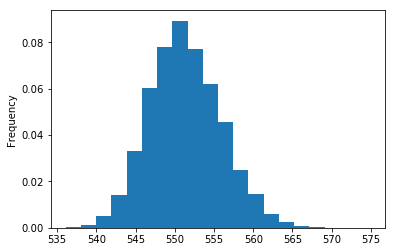

In [6]:
# Distribuição Bootstrap 
Hist = pd.Series(xbarra_Boot).plot.hist(normed = 1, bins=20)

In [7]:
# Intervalo de confiança Bootstrap Percentil (ou Quantil)
# Confiança = 0.95 ou seja Alpha = 0.05

Critico_d = np.percentile(xbarra_Boot,97.5)
Critico_e = np.percentile(xbarra_Boot,2.5)

print(Critico_d)
print(Critico_e)

560.8
543.0


In [8]:
# Tomada de decisão
# Continue...


___

# Qualidade da linha de produção

As latas de certa marca de refrigerante apresentam em seu rótulo o volume de 350 ml. Ainda, um órgão regulador diz que a dispersão dessas quantidades deve ser no máximo de 10 ml em seu conteúdo. 

** Linha de produção deve ser parada? **

Conjectura 1: O fabricante deseja testar se o conteúdo médio das latas é igual a 350 ml, como anunciado no rótulo. Isto equivale a verificar se a máquina está regulada para colocar 350 ml, ou não, nas latas. 

Conjectura 2: O fabricante deseja avaliar se a variabilidade dos conteúdos está sendo respeitada ou não.


Para averiguar tais hipóteses do fabricante, foi coletada uma amostra de 36 latas do refrigerante em pontos de comercialização e mediu-se o conteúdo destas latas.

Os resultados obtidos na amostra foram:

dados = [344.5,  352.9,  355.0,  348.8,
        	342.0,  344.7,  346.9,  340.9,
            357.7,  341.2,  347.1,  365.3,
            340.3,  343.2,  342.6,  333.7,
        	341.9,  351.0,  348.0,  354.3,
        	344.9,  348.0,  346.4,  358.0,
        	340.2,  354.4,  349.7,  339.4,
        	338.8,  344.9,  330.4,  341.7,
        	336.7,  363.2,  355.9,  357.4]


Avalie tais hipóteses com 95% de confiança?

Responda se a linha de produção deve ser interrompida e por qual motivo?

In [9]:
dados = [344.5,  352.9,  355.0,  348.8,
            342.0,  344.7,  346.9,  340.9,
            357.7,  341.2,  347.1,  365.3,
            340.3,  343.2,  342.6,  333.7,
            341.9,  351.0,  348.0,  354.3,
            344.9,  348.0,  346.4,  358.0,
            340.2,  354.4,  349.7,  339.4,
            338.8,  344.9,  330.4,  341.7,
            336.7,  363.2,  355.9,  357.4]

dados = pd.Series(dados)
n = len(dados)



In [10]:
#Conjectura 1: lista deverá ser construída com médias

#Continue...

In [11]:
#Conjectura 2: lista deverá ser construída com desvios padrões amostrais

#Continue...

___

# Experimento dos resistores - APS7 (um dos exercícios)

** Compraria o lote de resistores pelo valor médio e pela tolerância? **

Use a sua amostra para concluir se compraria o lote de resistores pelo controle de qualidade tanto quanto aos $1000 k\Omega$ e quanto aos $5\%$ de tolerância.

Use 95% de confiança para tomada de decisão!

In [13]:
dados=[1050,1010,920,930,1110,900,1020,1000,990,980,1140,1000,1030,1080,950]
dados = pd.Series(dados)
n = len(dados)

#Estimativas
xbarra = np.mean(dados)
dp = np.std(dados,ddof=1)

print("Média: ", xbarra)
print("Desvio padrão amostral: ", dp)


Média:  1007.3333333333334
Desvio padrão amostral:  68.3966025332782


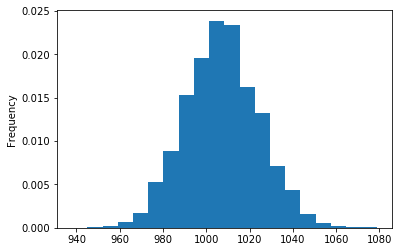

In [15]:
#Construção das Reamostragens da amostra mestre (dados) com reposição

xbarra_Boot = []

B = 15000
for i in range(B):
    xbarra = np.mean(np.random.choice(dados,size = n,replace = True))
    xbarra_Boot.append(xbarra)
    
Hist = pd.Series(xbarra_Boot).plot.hist(normed = 1, bins=20)

In [16]:
Critico_d = np.percentile(xbarra_Boot,97.5)
Critico_e = np.percentile(xbarra_Boot,2.5)

print(Critico_d)
print(Critico_e)

1040.66666667
974.666666667


## EX 1 Aula 22

## a)

In [22]:
n = 16
media = 90 #da outra cidade

valor_p = stats.t.ppf(0.9,loc = 90,df = n-1)
valor_p

91.340605607850449